# Task1 
Run the above code and interpret the results. Please note the output of the model is the
prediction of class labels of each of the four points. If you run the code several times, will you
observe the same results? Why? Keep the parameter “n_unit=1” and increase the number of
iterations starting from 10, 50, 100, 500, 2000, and compare the loss values. What can you
conclude from increasing the number of iterations? Now, with a fixed value of “iterations =
1000”, increase the parameter “n_unit” to 2, 5, 10 and interpret the results

In [1]:
# Logic Operator
import numpy as np
import matplotlib.pyplot as plt
# Sigmoid function
def sigmoid(x):
  return 1.0/(1+ np.exp(-x))

# derivative of Sigmoid function for backprop.
def sigmoid_derivative(x):
  return x * (1.0 - x)

class NeuralNetwork:
  def __init__(self, x, y, N):
    self.input = x
    self.neuron = N
    self.weights1 = np.random.rand(self.input.shape[1], self.neuron) # X dimension input connected to N neurons
    self.weights2 = np.random.rand(self.neuron, 1) # N neurons connected to output
    self.y = y
    self.output = np.zeros(self.y.shape) # instantiating the output
  def feedforward(self):
    self.layer1 = sigmoid(np.dot(self.input, self.weights1))
    self.output = sigmoid(np.dot(self.layer1, self.weights2))
  def backprop(self):
    # Chain rule to calculate derivative of the loss function with respect to weights2 and weights1
    d_weights2 = np.dot(self.layer1.T,(2*(self.y - self.output)* sigmoid_derivative(self.output)))
    d_weights1 = np.dot(self.input.T,(np.dot(2*(self.y - self.output)* sigmoid_derivative(self.output),self.weights2.T) * sigmoid_derivative(self.layer1)))
    # weights updating
    self.weights1 += d_weights1
    self.weights2 += d_weights2
iterations = 2000
n_unit = 1
if __name__ == "__main__":
  Input = np.array([[0,0,1],
  [0,1,1],
  [1,0,1],
  [1,1,1]])
  Target = np.array([[0],[0],[0],[1]])
  model = NeuralNetwork(Input, Target, n_unit)
  SSD = []
  for i in range(iterations):
    model.feedforward()
    model.backprop()
    errors = (Target - model.output)**2
    SSD.append(np.sum(errors)) # Objective(loss) function
Itr = np.linspace(1,len(SSD),len(SSD))
plt.plot(Itr, SSD)
plt.xlabel('Iterations')
plt.ylabel('SSD')
print("The target values are:", Target)
print("The predicted values are:", model.output)

The target values are: [[0]
 [0]
 [0]
 [1]]
The predicted values are: [[4.45815446e-04]
 [1.83476022e-02]
 [1.83476022e-02]
 [4.98112320e-01]]


_When running the code several times with the same number of iterations, the result keep changing. That's because the starting values for the weights are generated randomly. This makes that with a small number of iterations the variations are bigger. When increasing the number of iterations the loss values decrease until reaching a value around 0.2. However, increasing the parameter ''n_units'' it decreases the loss value more quickly than with iterations. Then the predicted values are closer to the target values._

# Task2 
Repeat task1 for XOR logic operator. For fixed values of parameters (iterations=2000,
and n_unit=1), which of the AND or XOR operators has lower loss values? Why? Increase the
number of neurons in the hidden layer (n_unit) to 2, 5, 10, 50. Does increasing the number of
neurons improve the results? Why

In [2]:

# Logic Operator
import numpy as np
import matplotlib.pyplot as plt
# Sigmoid function
def sigmoid(x):
  return 1.0/(1+ np.exp(-x))

# derivative of Sigmoid function for backprop.
def sigmoid_derivative(x):
  return x * (1.0 - x)

class NeuralNetwork:
  def __init__(self, x, y, N):
    self.input = x
    self.neuron = N
    self.weights1 = np.random.rand(self.input.shape[1], self.neuron) # X dimension input connected to N neurons
    self.weights2 = np.random.rand(self.neuron, 1) # N neurons connected to output
    self.y = y
    self.output = np.zeros(self.y.shape) # instantiating the output
  def feedforward(self):
    self.layer1 = sigmoid(np.dot(self.input, self.weights1))
    self.output = sigmoid(np.dot(self.layer1, self.weights2))
  def backprop(self):
    # Chain rule to calculate derivative of the loss function with respect to weights2 and weights1
    d_weights2 = np.dot(self.layer1.T,(2*(self.y - self.output)* sigmoid_derivative(self.output)))
    d_weights1 = np.dot(self.input.T,(np.dot(2*(self.y - self.output)* sigmoid_derivative(self.output),self.weights2.T) * sigmoid_derivative(self.layer1)))
    # weights updating
    self.weights1 += d_weights1
    self.weights2 += d_weights2
iterations = 2000
n_unit = 10
if __name__ == "__main__":
  Input = np.array([[0,0,1],
  [0,1,1],
  [1,0,1],
  [1,1,1]])
  Target = np.array([[1],[0],[0],[1]])
  model = NeuralNetwork(Input, Target, n_unit)
  SSD = []
  for i in range(iterations):
    model.feedforward()
    model.backprop()
    errors = (Target - model.output)**2
    SSD.append(np.sum(errors)) # Objective(loss) function
Itr = np.linspace(1,len(SSD),len(SSD))
plt.plot(Itr, SSD)
plt.xlabel('Iterations')
plt.ylabel('SSD')
print("The target values are:", Target)
print("The predicted values are:", model.output)

# Logic operator with Tensorflow Keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
Input = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
Target = np.array([[0],[1],[1],[0]], "float32")
n_unit = 10
model = Sequential()
model.add(Dense(n_unit, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',
 optimizer = SGD(lr = 0.01),
 metrics=['binary_accuracy'])
model.fit(Input, Target, epochs = 2000, verbose=0)
print("The predicted class labels are:", model.predict(Input))


The target values are: [[1]
 [0]
 [0]
 [1]]
The predicted values are: [[0.988047  ]
 [0.01663467]
 [0.01634836]
 [0.9816194 ]]


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 59ms/step
The predicted class labels are: [[0.47327012]
 [0.57752395]
 [0.6162353 ]
 [0.38666376]]


We can see that AND has lower loss values than XOR (0.99).

- AND operator is easily to learn by the neural network, beacuse is linearly separable and simple logical operation. It outputs a 1 only when both input values are 1 and outputs 0 for all other input combinations.

- XOR operator is more dificult to learn beacuse is a more complex logical operation and not linearly separable. It outputs a 1 only when exactly one of the input values is 1 and outputs 0 for all other input combinations. So,it requires a more complex representations.

On the other hand, when increasing the number of neurons in the hidden layer, we can see that the results improve. Obtaining outputs closer to the target and also reducing the loss value.


# Task3 
In the above code, change the parameter “n_unit” as 1, 10 and interpret the observed results.

Using Tensorflow code is quickly (0,35ms/step) and more accurate to the target values. In addition, tensorflow and numpy obtain quite similar results.

# Task 4
Review the following data loader code and find out how it works. Run it to load the
training and test data.

In [3]:
# Data Loader
import os
import numpy as np
from random import shuffle
from skimage.io import imread
from skimage.transform import resize
def gen_labels(im_name, pat1, pat2):

     '''
     Parameters
     ----------
     im_name : Str
     The image file name.
     pat1 : Str
     A string pattern in the filename for 1st class, e.g "Mel"
     pat2 : Str
     A string pattern in the filename 2nd class, e.g, "Nev"
     Returns
     -------
     Label : Numpy array
     Class label of the filename name based on its pattern.
     '''
     if pat1 in im_name:
         label = np.array([0])
     elif pat2 in im_name:
         label = np.array([1])
     return label
def get_data(data_path, data_list, img_h, img_w):
    img_labels = []
    """
     Parameters
     ----------
     train_data_path : Str
     Path to the data directory
     train_list : List
     A list containing the name of the images.
     img_h : Int
     image height to be resized to.
     img_w : Int
     image width to be resized to.
     Returns
     -------
     img_labels : Nested List
     A nested list containing the loaded images along with their
     correcponding labels.
     """
    for item in enumerate(data_list):
         img = imread(os.path.join(data_path, item[1]), as_gray = True) # "as_grey"
         img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
         img_labels.append([np.array(img), gen_labels(item[1], 'Mel', 'Nev')])

         if item[0] % 100 == 0:
             print('Reading: {0}/{1} of train images'.format(item[0], len(data_list)))
    shuffle(img_labels)
    return img_labels

def get_data_arrays(nested_list, img_h, img_w):
     """
     Parameters
     ----------
     nested_list : nested list
     nested list of image arrays with corresponding class labels.
     img_h : Int
     Image height.
     img_w : Int
     Image width.
    6
    Deep Learning Methods for Medical Image Analysis (CM2003)
    Laboratory Assignment 1
     Returns
     -------
     img_arrays : Numpy array
     4D Array with the size of (n_data,img_h,img_w, 1)
     label_arrays : Numpy array
     1D array with the size (n_data).
     """
     img_arrays = np.zeros((len(nested_list), img_h, img_w), dtype = np.float32)
     label_arrays = np.zeros((len(nested_list)), dtype = np.int32)
     for ind in range(len(nested_list)):
         img_arrays[ind] = nested_list[ind][0]
         label_arrays[ind] = nested_list[ind][1]
     img_arrays = np.expand_dims(img_arrays, axis =3)
     return img_arrays, label_arrays

def get_train_test_arrays(train_data_path, test_data_path, train_list,
 test_list, img_h, img_w):
     """
     Get the directory to the train and test sets, the files names and
     the size of the image and return the image and label arrays for
     train and test sets.
     """

     train_data = get_data(train_data_path, train_list, img_h, img_w)
     test_data = get_data(test_data_path, test_list, img_h, img_w)

     train_img, train_label = get_data_arrays(train_data, img_h, img_w)
     test_img, test_label = get_data_arrays(test_data, img_h, img_w)
     del(train_data)
     del(test_data)
     return train_img, test_img, train_label, test_label

img_w, img_h = 128, 128 # Setting the width and heights of the images.
data_path = '../Data/Lab1/Skin/' # Path to data root with two subdirs.
train_data_path = os.path.join(data_path, 'train')
test_data_path = os.path.join(data_path, 'test')
train_list = os.listdir(train_data_path)
test_list = os.listdir(test_data_path)
x_train, x_test, y_train, y_test = get_train_test_arrays(train_data_path, test_data_path,train_list, test_list, img_h, img_w)

Reading: 0/1000 of train images
Reading: 100/1000 of train images
Reading: 200/1000 of train images
Reading: 300/1000 of train images
Reading: 400/1000 of train images
Reading: 500/1000 of train images
Reading: 600/1000 of train images
Reading: 700/1000 of train images
Reading: 800/1000 of train images
Reading: 900/1000 of train images
Reading: 0/200 of train images
Reading: 100/200 of train images


# Task 5
Develop a 4-layers MLP. If you call the number of neurons in the first fully-connected layer as “base_dense”, this 4-layers MLP should contain “base_dense”, “base_dense//2”, and “base_dense//4” as the number of neurons in the first 3 layers respectively. The activation function of all those neurons should set as “Relu”. However, in the last layer (4th layer), choose a proper number of neurons as well as activation function(s) that fit the binary classification task.
Develop your model as a function, and remember to, first, import all the required layers/tools
from tensorflow.

In [49]:
import tensorflow as tf
import keras
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input,Dense,Flatten 

def model(img_width, img_height, img_ch, base_dense):
    input_size = (img_width, img_height, img_ch)
    inputs_layer = Input(shape=input_size, name='input_layer')
    x = Flatten()(inputs_layer)
    x = Dense(base_dense, activation='relu')(x)
    x = Dense(base_dense//2, activation="relu")(x)
    x = Dense(base_dense//4, activation="relu")(x)
    out = Dense(1, activation="sigmoid")(x)
    
    # TODO
    clf = tf.keras.Model(inputs=inputs_layer, outputs=out)
    clf.summary()
    return clf

# Example usage:
img_width = img_w
img_height = img_h
img_ch = 1
base_dense = 256
learning_rate = 0.0001

mlp_model = model(img_width, img_height, img_ch, base_dense)

# Compile the model
mlp_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy', metrics=['binary_accuracy'])

# Define training parameters
n_epochs = 150
batch_size = 16

# Generate some example data (replace with your actual data)
train_data = x_train
train_labels = y_train
val_data = x_test
val_labels = y_test

# Train the model
clf_hist = mlp_model.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=n_epochs, batch_size=batch_size)


Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 128, 128, 1)]     0         
                                                                 
 flatten_30 (Flatten)        (None, 16384)             0         
                                                                 
 dense_119 (Dense)           (None, 256)               4194560   
                                                                 
 dense_120 (Dense)           (None, 128)               32896     
                                                                 
 dense_121 (Dense)           (None, 64)                8256      
                                                                 
 dense_122 (Dense)           (None, 1)                 65        
                                                                 
Total params: 4,235,777
Trainable params: 4,235,777
Non-tr

# Task 6 
The values of loss and accuracy metrics are saved within the variable “clf_hist”. You can
use the following code to visualize the loss curves:

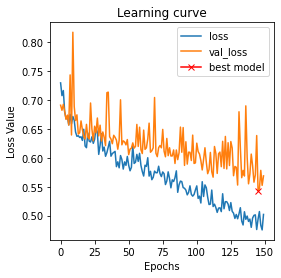

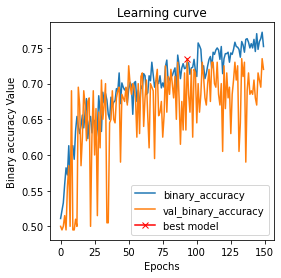

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
plt.plot( np.argmin(clf_hist.history["val_loss"]),
        np.min(clf_hist.history["val_loss"]),
        marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();



plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["binary_accuracy"], label="binary_accuracy")
plt.plot(clf_hist.history["val_binary_accuracy"], label="val_binary_accuracy")
plt.plot( np.argmax(clf_hist.history["val_binary_accuracy"]),
        np.max(clf_hist.history["val_binary_accuracy"]),
        marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Binary accuracy Value")
plt.legend();

_How do you interpret the observed values of loss and accuracy values?_

We can see that increasing the number of epochs, the loss value decreases and the accuracy increases. That's because every epoch means a complete pass through the entire training dataset. In other words, it's the number of times the model has seen and learned from the entire training dataset. So as this number goes increasing the error is less, and accuracy is higher.

_Is the number of epochs enough to make a good decision about model performance?_

We consider that it's not good enough as long as the oscillation of the loss and accuracy values is still reasonably big. In order to make a good decision about model performance we should increase the number of epochs in order to obtain stable values.


_For the same number of epochs, reduce the learning rate parameter to 0.1 and interpret the results._

Reducing the learning rate to 0.1 makes the values of loss and acccuracay values become stable with less number of epochs, but in a worse value. The loss value gets stable at a 0.69, which is higher than with the previous learning rate, and the binary accuracy value gets stable at 0.5, which is less than before. 
The fact that using a higher learning rate value produces worse performance is because the size of the steps is bigger, which leads to overshooting the optimal solution.

_Now increase the number of epochs to 150 with LR=0.0001. Does this model have enough capacity to yield acceptable results?_

The model has not enough capacity to yield acceptable result because the loss and accuracy values still oscilating so it has not stability enough to accept it.

_Increase the “base_dense” parameter to 256 and compare the results with the case of “base_dense=64”. Is increasing the model capacity helpful to improve the model performance? Why?_

Increasing the model capacity improve the model performance beacuse we can see higher binary accuracy and lower loss values. So it is better to increase the "base_dense" to have better results.

